In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GaussianNoise
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print("x_train shape: {}, y_train shape: {}".format(x_train.shape, y_train.shape))

x_train shape: (60000, 28, 28), y_train shape: (60000,)


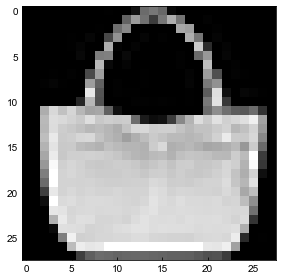

In [4]:
plt.imshow(x_train[100], cmap='gray')

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

In [6]:
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_val = x_val.reshape(len(x_val), 28, 28, 1)

In [7]:
print(x_train.shape)
print(x_val.shape)

(54000, 28, 28, 1)
(6000, 28, 28, 1)


In [8]:
x_train = x_train.astype('float32')/255.
x_val = x_val.astype('float32')/255.

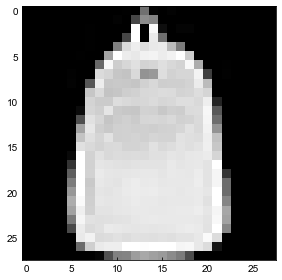

In [9]:
plt.imshow(x_train[10].reshape(28,28), cmap='gray')

In [10]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [17]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding='same',
                 activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)             

In [18]:
model.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [ ]:
early_stopping = EarlyStopping()
hist = model.fit(x_train, y_train, epochs=100, batch_size=256,
                 validation_data=(x_val, y_val), callbacks=[early_stopping])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 6s 111us/step - loss: 0.7273 - acc: 0.7305 - val_loss: 0.4492 - val_acc: 0.8360
Epoch 2/100
54000/54000 [==============================] - 5s 101us/step - loss: 0.4618 - acc: 0.8325 - val_loss: 0.3617 - val_acc: 0.8723
Epoch 3/100
54000/54000 [==============================] - 5s 101us/step - loss: 0.4019 - acc: 0.8549 - val_loss: 0.3301 - val_acc: 0.8807
Epoch 4/100
20224/54000 [==========>...................] - ETA: 3s - loss: 0.3680 - acc: 0.8674

In [150]:
final_loss, final_acc = model.evaluate(x_pca_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 1.0516, final accuracy: 0.6703


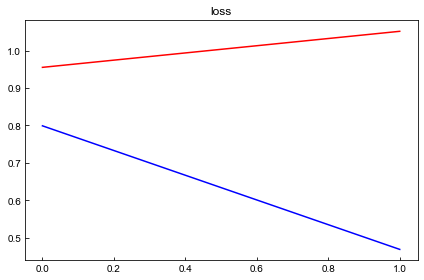

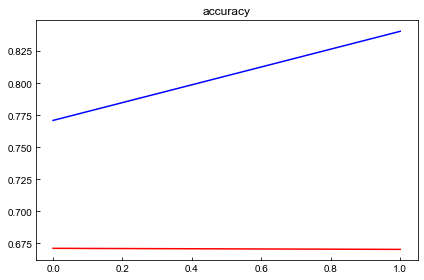

In [151]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.title('loss')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.title('accuracy')
plt.show()

In [71]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
pprint(cm)

array([[549,   0,   4,  10,   2,   0,  27,   0,   4,   0],
       [  1, 551,   1,   6,   2,   1,   1,   0,   0,   0],
       [ 13,   0, 518,   4,  46,   0,  14,   0,   2,   0],
       [ 13,   0,   2, 563,  23,   0,   8,   0,   0,   0],
       [  1,   0,  32,   7, 519,   0,  27,   0,   1,   0],
       [  0,   0,   0,   0,   0, 586,   0,   8,   1,   5],
       [113,   1,  60,  11,  60,   1, 375,   0,   3,   0],
       [  0,   0,   0,   0,   0,   6,   0, 619,   1,   5],
       [  2,   0,   3,   0,   5,   2,   5,   0, 563,   1],
       [  0,   0,   0,   0,   0,   3,   0,  27,   0, 582]], dtype=int64)


In [87]:
y_hat = model.predict(df_test.values, batch_size=64)
y_pred = np.argmax(y_hat,axis=1)

In [88]:
with open('submission.csv', 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))